fonte: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
%matplotlib inline
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t' )

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Descrição das variáveis


## Dados de cliente:

**ID**: nº de cadastro de cliente

**Year_Birth**: Ano de Nascimento

**Education**: Nível de Educação

**Marital_Status**: Estado Civil

**Income**: Renda Média Anual

**Kidhome**: Crianças em casa

**Teenhome**: Adolescentes em casa

**Dt_Customer**: data do cadastro

**Recency**: dias desde a última compra


## Valor gasto com diferentes tipos de produtos nos últimos dois anos:

**MntWines**: Vinhos

**MntFruits**: Frutas

**MntMeatProducts**: Carne

**MntFishProducts**: Peixe

**MntSweetProducts**: Doces

**MntGoldProds**: Ouro



## Informações sobre o local da venda:

**NumWebPurchases**: nº de vendas no site

**NumCatalogPurchases**: nº de vendas no catálogo

**NumStorePurchases**: nº de vendas presenciais

**NumWebVisitsMonth**: nº de visitas no site no último mês


## Informações sobre promoções:

**NumDealsPurchases**: nº de vendas com desconto

**AcceptedCmp3**: Cliente aceitou a oferta na 1ª campanha

**AcceptedCmp4**: Cliente aceitou a oferta na 2ª campanha

**AcceptedCmp5**: Cliente aceitou a oferta na 3ª campanha

**AcceptedCmp1**: Cliente aceitou a oferta na 4ª campanha

**AcceptedCmp2**: Cliente aceitou a oferta na 5ª campanha

**Response**: Cliente aceitou a oferta da última campanha

**Complain**: Cliente reclamou nos últimos dois anos

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Aqui é possível perceber que as colunas *Z_CostContact* e *Z_Revenue* possuem valor constante, o que não é útil para análise.

A coluna *ID* tampouco representa algum ganho de informação portanto também será removida.

Prossigo com a remoção das colunas citadas:

In [7]:
df.drop(columns = ['Z_CostContact', 'Z_Revenue','ID'], inplace = True)

In [8]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Na coluna *Education* vou substituir seus valores por Low, Medium e High

In [9]:
df['Education'].replace({'Basic':'Low','2n Cycle':'Low','Graduation':'Medium','Master':'High','PhD':'High'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

A coluna *Dt_Customer* possuestá no formato object, a seguir faço o tratamento dessa coluna para mostrar o número de dias desde a primeira compra do cliente

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)

In [12]:
max(df['Dt_Customer'])

Timestamp('2014-06-29 00:00:00')

A data mais recente da coluna *Dt_Customer* é 29 de julho de 2014

Vou substituir os valores da coluna *Year_Birth* pela idade calculada pela diferença entre o ano de nascimento e 2014

Vou substituir seus valores pela diferença entre as respectivas datas e a última



In [13]:
def idade(x):
    x = 2014 - x
    return x

df['Year_Birth'] = df['Year_Birth'].apply(idade)

In [14]:
def dias(x):
    dfinal = max(df['Dt_Customer'])
    y = dfinal - x
    return y

df['Dt_Customer'] = df['Dt_Customer'].apply(dias).dt.days

Abaixo, a coluna *Kidhome* passa a se chamar *Children* e armazena a soma de *Kidhome* com *Teenhome*

A nova coluna 'Expenses' é a soma das quantias gastas em cada setor.

A nova coluna 'AccepetedCmp' é a soma das respostas às primeiras ofertas enviadas ao cliente.

A nova coluna 'NumPurchases' é a soma do número de compras que o cliente efetuou.

A coluna *Year_Birth* passa a se chamar *Age* e a coluna *Dt_Customer* passa a se chamar *CustomerFor*


In [15]:
df['Kidhome'] = df['Kidhome'] + df['Teenhome']
df.rename(columns = {'Kidhome':'Children', 'Year_Birth':'Age', 'Dt_Customer':'CustomerFor'}, inplace = True)

df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['NumPurchases'] =  df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

df['TotalExpenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [16]:
df.drop(columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                  'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases',
                  'Teenhome','NumWebVisitsMonth'], inplace = True)

In [17]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Sobre a coluna *Marital_Status*, o valor *Absurd* não é exatamente um estado civil válido, portanto será excluído

Quanto aos valores *Alone* e *YOLO* vou substituir por *Single*

Já o valor *Together* será substituído por *Married* pois ambos refletem o um casal vivendo junto

In [18]:
df = df[df['Marital_Status'] != 'Absurd']

df['Marital_Status'].replace({'Alone':'Single','YOLO':'Single','Together':'Married'}, inplace = True)

A seguir uso a coluna *Marital_Status* somada à coluna *Children* para criar uma nova coluna *FamilySize* que contém o tamanho da família do cliente 

In [19]:
df['FamilySize'] = df['Marital_Status'].replace({'Single':1,'Together':2,'Married':2,'Divorced':1,'Widow':1}) + df['Children']

In [20]:
df.head()

,Age,Education,Marital_Status,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize
0,57,Medium,Single,58138.0,0,663,58,635,88,546,172,88,88,0,1,0,25,1617,1
1,60,Medium,Single,46344.0,2,113,38,11,1,6,2,1,6,0,0,0,6,27,3
2,49,Medium,Married,71613.0,0,312,26,426,49,127,111,21,42,0,0,0,21,776,2
3,30,Medium,Married,26646.0,1,139,26,11,4,20,10,3,5,0,0,0,8,53,3
4,33,High,Married,58293.0,1,161,94,173,43,118,46,27,15,0,0,0,19,422,3


In [21]:
df.describe()

,Age,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize
count,2238.000000,2214.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,45.199732,52229.077687,0.951296,353.573280,49.105898,303.889634,26.250223,166.819929,37.375335,27.059875,43.878910,0.009383,0.148794,0.297140,14.857909,605.273905,2.596515
std,11.975906,25176.330210,0.751601,202.129839,28.974777,336.726585,39.749663,225.704653,54.421568,41.288749,51.956423,0.096434,0.355964,0.677699,7.678987,602.262371,0.906109
min,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,37.000000,35265.000000,0.000000,181.000000,24.000000,23.250000,1.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,8.000000,68.250000,2.000000
50%,44.000000,51371.000000,1.000000,355.500000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,0.000000,0.000000,0.000000,15.000000,396.000000,3.000000
75%,55.000000,68487.000000,1.000000,528.750000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,0.000000,0.000000,0.000000,21.000000,1043.750000,3.000000
max,121.000000,666666.000000,3.000000,699.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,1.000000,1.000000,4.000000,44.000000,2525.000000,5.000000


In [22]:
df['MntWines'].mean()/df['TotalExpenses'].mean()

0.5020696100628745

In [23]:
df['MntMeatProducts'].mean()/df['TotalExpenses'].mean()

0.2756106401654212

In [24]:
df['TotalExpenses'].mean()/df['NumPurchases'].mean()

40.73748947431733

## Sobre o consumidor médio:

- renda anual 51,6 mil dólares

- média de idade: 45 anos

- 50% das despesas são no setor de vinhos

- 27,5% das despesas são no detor de carnes

- carrinho médio de 40 dólares

In [25]:
numcols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
catcols = df.select_dtypes(include='object').columns.tolist()

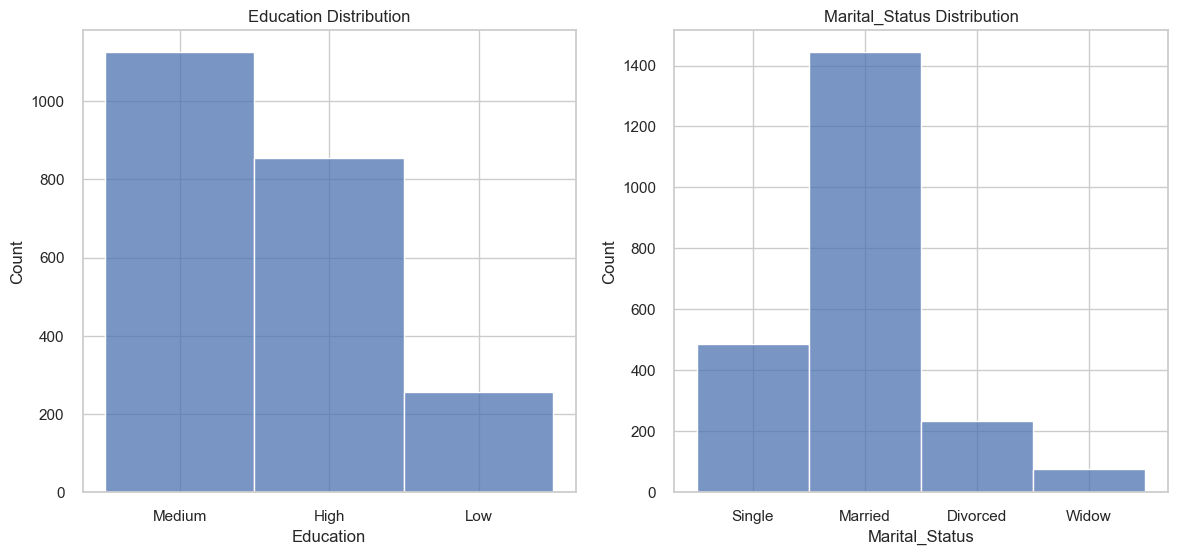

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

for idx,column in enumerate(catcols):
    plt.subplot(1,2,idx+1)
    sns.histplot(x = column, data = df)
    plt.title("{} Distribution" .format(column))

Abaixo verifico a distribuição de *Income* e *Age* para identificar e remover outliers

<AxesSubplot:ylabel='Income'>

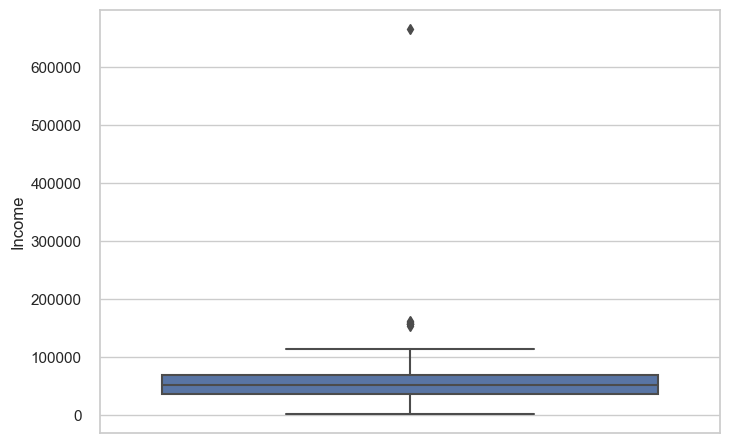

In [27]:
sns.boxplot(data = df, y = 'Income')

<AxesSubplot:ylabel='Age'>

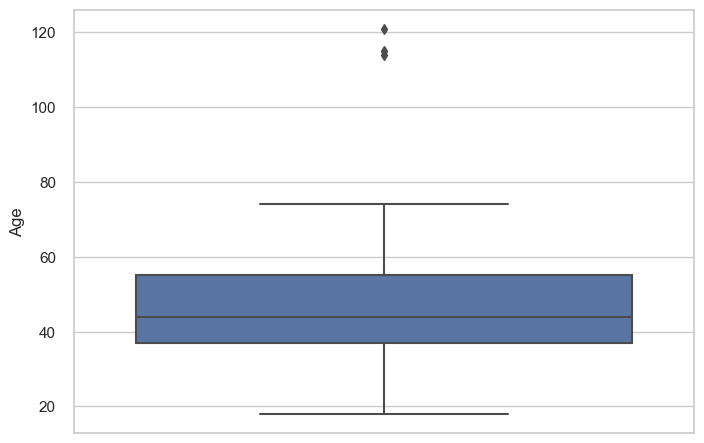

In [28]:
sns.boxplot(data = df, y = 'Age')

In [29]:
df = df[df['Income'] < 150000]

In [30]:
df = df[df['Age'] < 80]

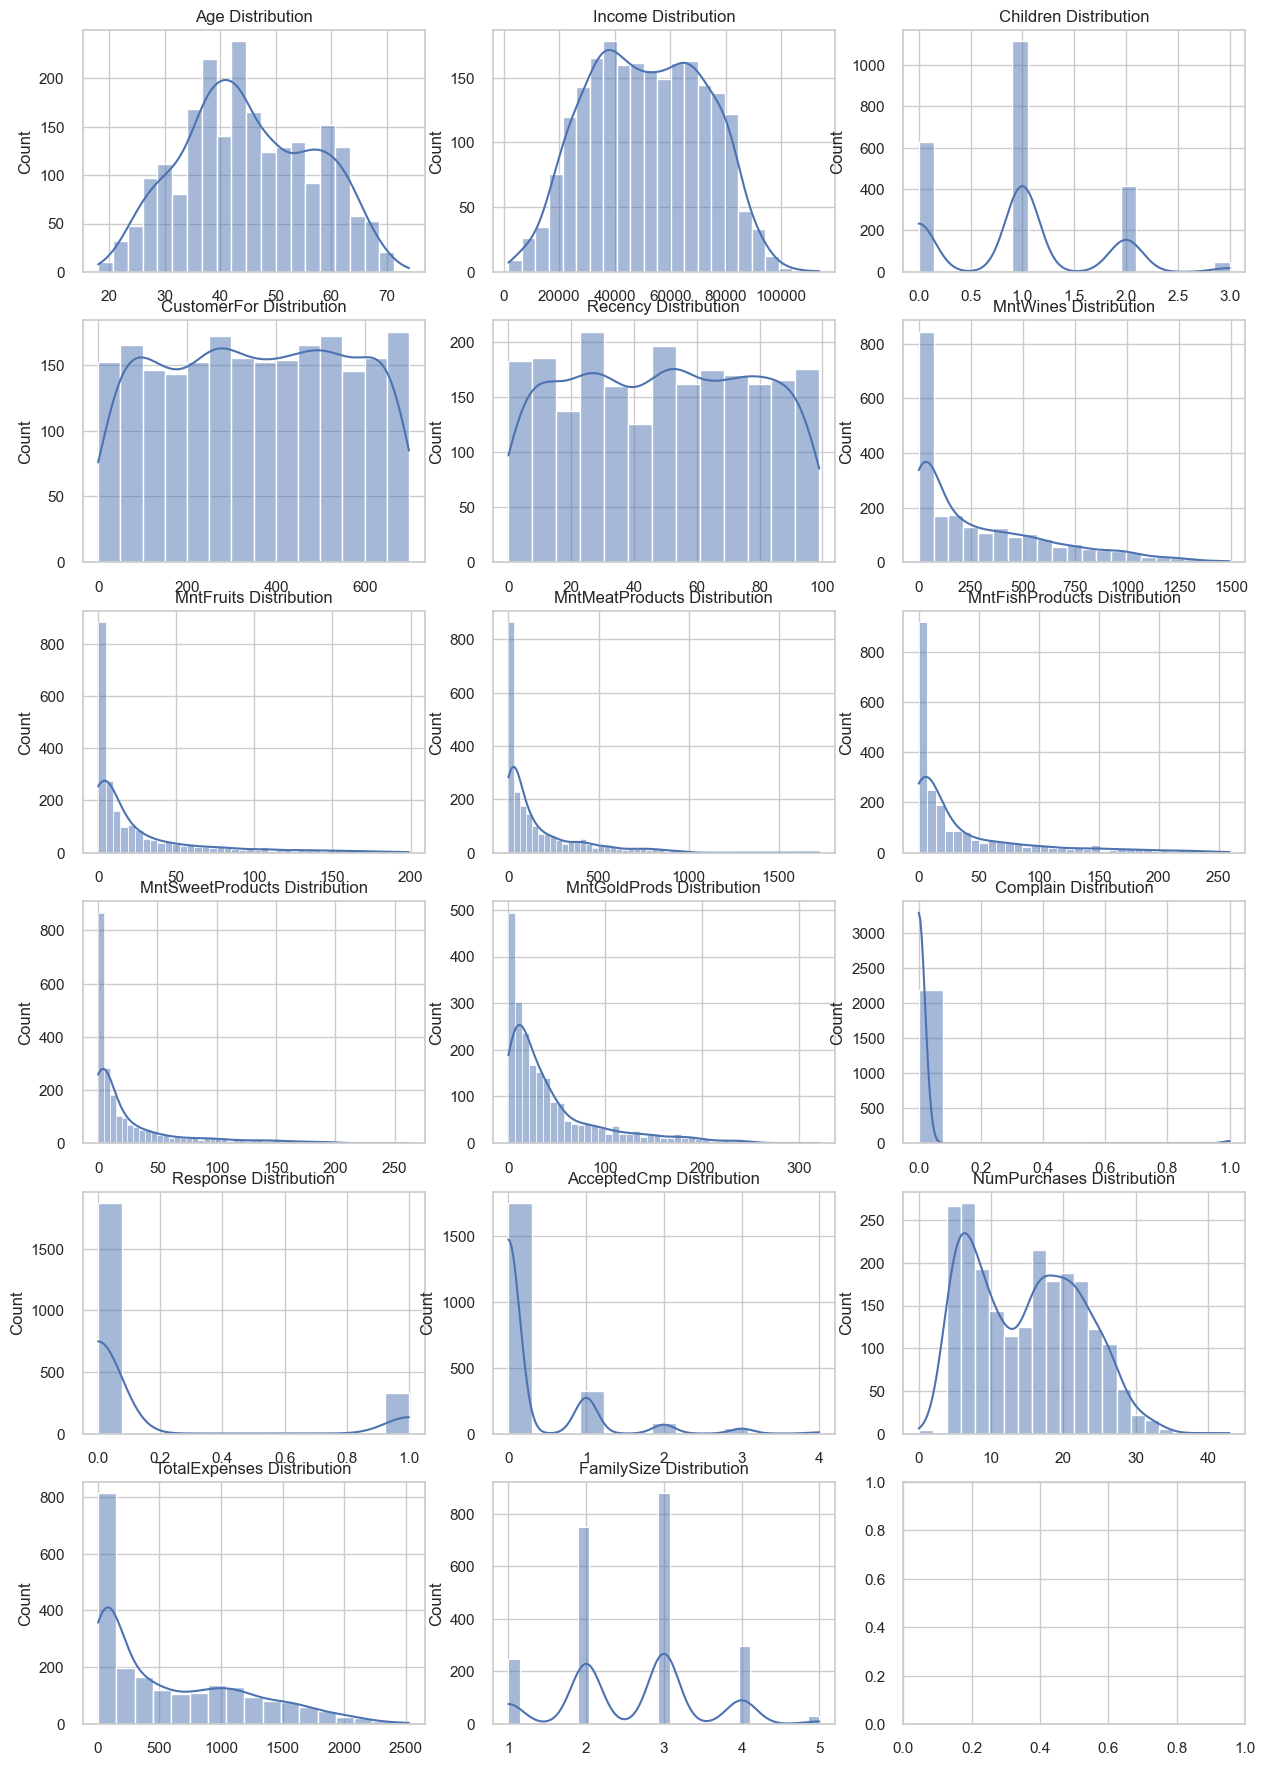

In [31]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (15,22))

for idx,column in enumerate(numcols):
    plt.subplot(6,3,idx+1)
    sns.histplot(x = column, data = df, kde = True)
    plt.title("{} Distribution" .format(column))
    plt.xlabel('')

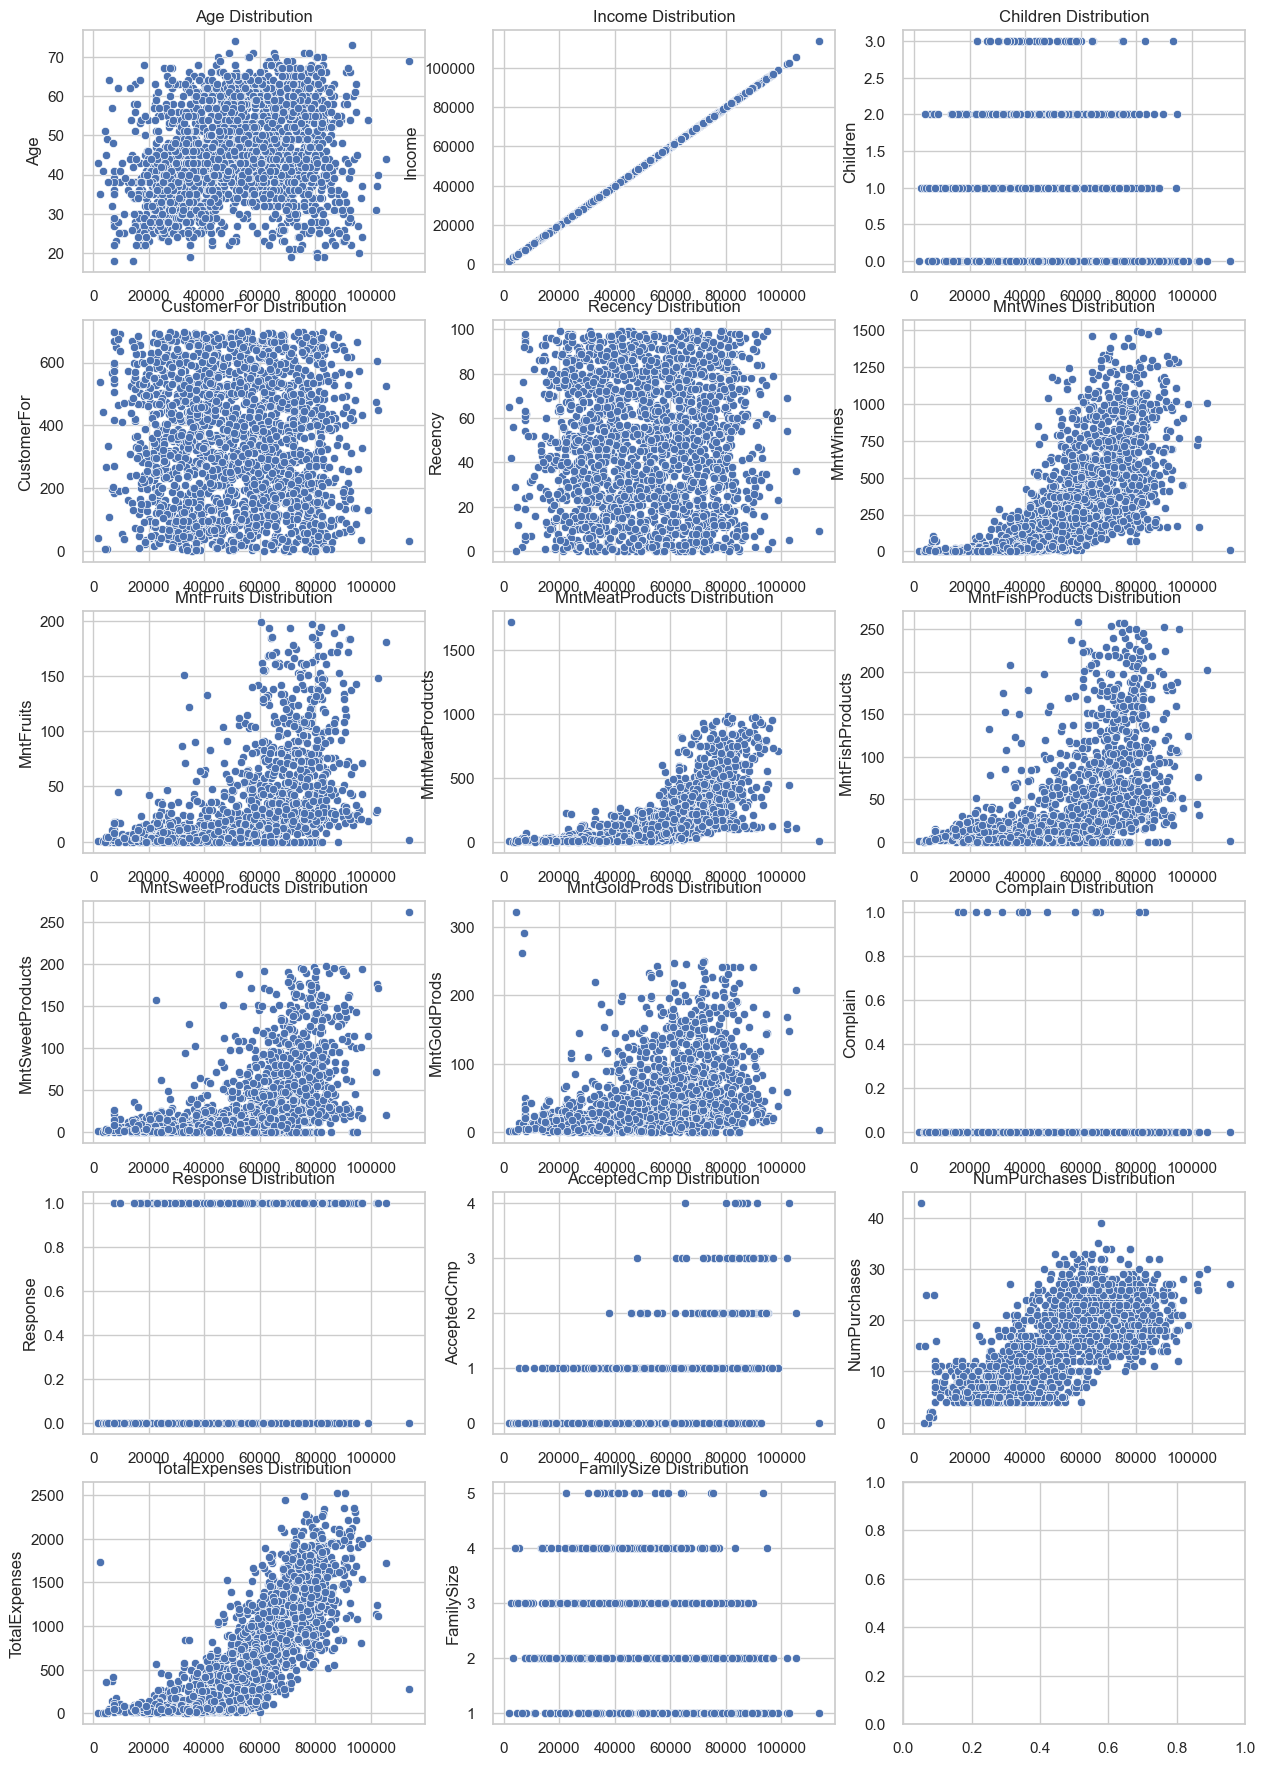

In [32]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (15,22))

for idx,column in enumerate(numcols):
    plt.subplot(6,3,idx+1)
    sns.scatterplot(y = column, x = 'Income', data = df)
    plt.title("{} Distribution" .format(column))
    plt.xlabel('')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2203 non-null   int64  
 1   Education         2203 non-null   object 
 2   Marital_Status    2203 non-null   object 
 3   Income            2203 non-null   float64
 4   Children          2203 non-null   int64  
 5   CustomerFor       2203 non-null   int64  
 6   Recency           2203 non-null   int64  
 7   MntWines          2203 non-null   int64  
 8   MntFruits         2203 non-null   int64  
 9   MntMeatProducts   2203 non-null   int64  
 10  MntFishProducts   2203 non-null   int64  
 11  MntSweetProducts  2203 non-null   int64  
 12  MntGoldProds      2203 non-null   int64  
 13  Complain          2203 non-null   int64  
 14  Response          2203 non-null   int64  
 15  AcceptedCmp       2203 non-null   int64  
 16  NumPurchases      2203 non-null   int64  


## Sobre os dados:
- 

In [34]:
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
cat_transformer = Pipeline(steps = [('label', OneHotEncoder())])

In [35]:
numcols

['Age',
 'Income',
 'Children',
 'CustomerFor',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Complain',
 'Response',
 'AcceptedCmp',
 'NumPurchases',
 'TotalExpenses',
 'FamilySize']

In [36]:
transformer = [('num',num_transformer,numcols),
               ('cat',cat_transformer,['Education','Marital_Status'])]

preprocessor = ColumnTransformer(transformers = transformer)

In [37]:
X = preprocessor.fit_transform(df)

O próximo passo será a redução de dimensionalidade pelo método PCA

In [38]:
pca = PCA(n_components = 3)
pca.fit(X)

pcaX = pd.DataFrame(pca.transform(X), columns = (['x','y','z']))
pcaX.head()

,x,y,z
0,4.827537,-0.941822,0.079033
1,-2.587257,0.519925,-0.176543
2,1.532940,-0.457688,-0.753220
3,-2.515051,-1.101730,-0.124959
4,-0.372641,0.091415,-1.223330


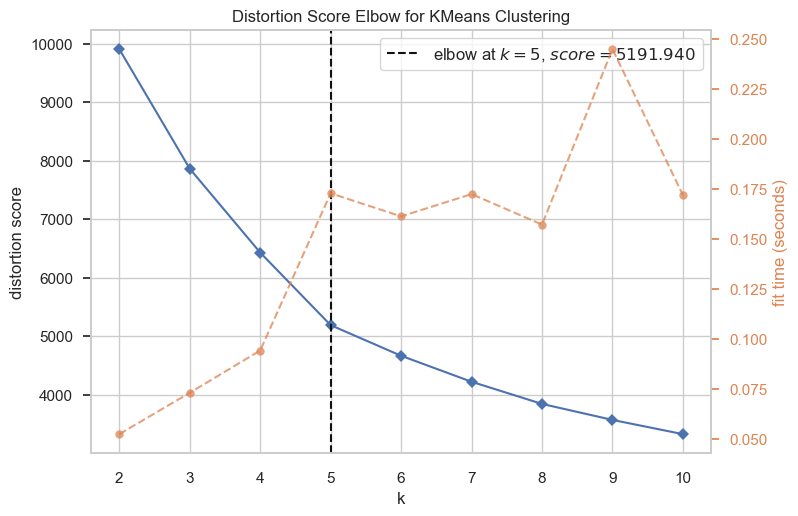

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pcaX)
Elbow_M.show()

In [40]:
model1 = Pipeline(steps = [('cluster', KMeans(n_clusters = 5))])

In [41]:
model1.fit(pcaX)

Pipeline(steps=[('cluster', KMeans(n_clusters=5))])

In [42]:
df['cluster'] = model1.predict(pcaX)

In [43]:
df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Children',
       'CustomerFor', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain',
       'Response', 'AcceptedCmp', 'NumPurchases', 'TotalExpenses',
       'FamilySize', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='Count'>

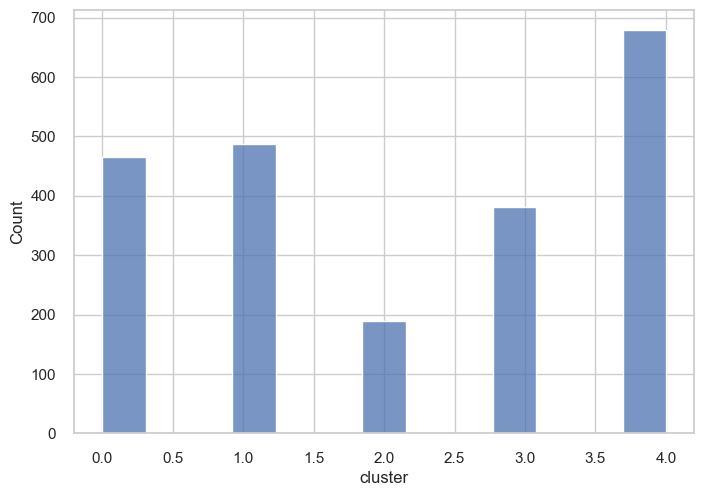

In [44]:
sns.histplot(data = df, x = 'cluster')

In [45]:
c0 = df[df['cluster'] == 0]
c0.describe()

,Age,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize,cluster
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,49.849785,42275.000000,1.892704,310.446352,51.525751,90.362661,3.669528,29.628755,5.442060,3.738197,16.281116,0.010730,0.053648,0.096567,10.165236,149.122318,3.637339,0.0
std,8.850428,11545.992309,0.538087,200.523772,28.586040,98.309099,5.593988,28.927970,8.110386,6.173140,20.864446,0.103137,0.225564,0.309889,4.738830,131.392689,0.589715,0.0
min,29.000000,4023.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,3.000000,0.0
25%,43.000000,34951.750000,2.000000,124.250000,27.000000,19.000000,0.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,6.000000,45.000000,3.000000,0.0
50%,49.000000,42749.000000,2.000000,296.500000,52.500000,49.000000,2.000000,19.000000,3.000000,2.000000,10.000000,0.000000,0.000000,0.000000,9.000000,92.000000,4.000000,0.0
75%,58.000000,50365.250000,2.000000,467.000000,77.000000,137.500000,5.000000,40.000000,7.000000,5.000000,23.000000,0.000000,0.000000,0.000000,13.000000,249.250000,4.000000,0.0
max,68.000000,70844.000000,3.000000,699.000000,99.000000,456.000000,42.000000,171.000000,65.000000,67.000000,291.000000,1.000000,1.000000,2.000000,26.000000,542.000000,5.000000,0.0


In [46]:
c0['TotalExpenses'].mean()/c0['NumPurchases'].mean()

14.669833227781295

In [47]:
c0['Marital_Status'].value_counts()

Married     347
Single       63
Divorced     42
Widow        14
Name: Marital_Status, dtype: int64

In [48]:
c0['MntWines'].mean()/c0['TotalExpenses'].mean()

0.6059633621620066

In [49]:
c0.shape

(466, 20)

In [50]:
to_compare = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
x = []

for idx,col in enumerate(to_compare):
    x.append(c0[col].mean()/c0['TotalExpenses'].mean())
    
spent = pd.DataFrame(index = to_compare, data = x)

spent

,0
MntWines,0.605963
MntFruits,0.024608
MntMeatProducts,0.198688
MntFishProducts,0.036494
MntSweetProducts,0.025068
MntGoldProds,0.109180


## Sobre o cluster 0:

- idade média de 49 anos

- Renda média de 42,2 mil dólares anuais (Baixa)

- mais de 1 filho

- 60,8% das despesas no setor de vinhos

- 19,7% das despesas no setor de carnes

- 10,9% das despesas no setor de Ouro

- despesas: 150 dólares

In [51]:
c1 = df[df['cluster'] == 1]
c1.describe()

,Age,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize,cluster
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.0
mean,49.737705,60577.690574,1.079918,394.641393,48.114754,503.793033,24.963115,162.672131,34.534836,24.143443,64.110656,0.016393,0.096311,0.272541,21.704918,814.217213,2.788934,1.0
std,10.095481,10962.749287,0.528224,195.492041,28.082146,268.597239,27.320568,126.304686,37.985986,26.979343,53.875970,0.127113,0.295321,0.522103,4.679789,303.725482,0.680108,0.0
min,24.000000,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,302.000000,1.000000,1.0
25%,42.000000,54434.000000,1.000000,250.750000,25.000000,297.000000,6.000000,86.000000,8.000000,6.000000,24.000000,0.000000,0.000000,0.000000,18.000000,573.000000,2.000000,1.0
50%,49.500000,61285.000000,1.000000,417.500000,48.000000,469.000000,16.000000,135.000000,21.000000,15.000000,47.000000,0.000000,0.000000,0.000000,21.000000,769.500000,3.000000,1.0
75%,58.000000,67281.250000,1.000000,565.250000,71.000000,656.000000,35.000000,215.250000,49.250000,33.000000,91.250000,0.000000,0.000000,0.000000,25.000000,1002.000000,3.000000,1.0
max,71.000000,94871.000000,3.000000,698.000000,99.000000,1396.000000,142.000000,1725.000000,258.000000,150.000000,321.000000,1.000000,1.000000,2.000000,43.000000,1829.000000,5.000000,1.0


In [52]:
c1['TotalExpenses'].mean()/c0['NumPurchases'].mean()

80.09821011430766

In [53]:
c1['Marital_Status'].value_counts()

Married     346
Single       70
Divorced     54
Widow        18
Name: Marital_Status, dtype: int64

In [54]:
c1.shape

(488, 20)

In [55]:
to_compare = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
x = []

for idx,col in enumerate(to_compare):
    x.append(c1[col].mean()/c1['TotalExpenses'].mean())
    
spent = pd.DataFrame(index = to_compare, data = x)

spent

,0
MntWines,0.618745
MntFruits,0.030659
MntMeatProducts,0.199790
MntFishProducts,0.042415
MntSweetProducts,0.029652
MntGoldProds,0.078739


## Sobre o cluster 1:

- idade média de 49 anos

- renda anual média de 60 mil dólares (Média)

- possui 1 filho

- 61,9% das despesas no setor de vinhos

- 19,9% das despesas no setor de carnes

- despesas: 814 dólares

##### c2 = df[df['cluster'] == 2]
c2.describe()

In [57]:
c2['TotalExpenses'].mean()/c0['NumPurchases'].mean()

153.2851658619022

In [58]:
c2['Marital_Status'].value_counts()

Married     95
Single      54
Divorced    31
Widow        9
Name: Marital_Status, dtype: int64

In [59]:
c2.shape

(189, 20)

In [60]:
to_compare = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
x = []

for idx,col in enumerate(to_compare):
    x.append(c2[col].mean()/c2['TotalExpenses'].mean())
    
spent = pd.DataFrame(index = to_compare, data = x)

spent

,0
MntWines,0.536119
MntFruits,0.034632
MntMeatProducts,0.297895
MntFishProducts,0.047895
MntSweetProducts,0.036411
MntGoldProds,0.047046


## Sobre o cluster 2:

- média de idade de 45 anos

- renda média de 77,6 mil dólares (Alta)

- definitivamente sem filhos

- 53,6% das despesas no setor de vinhos

- 29% das despesas no setor de carnes

- despesas: 1558 dólares

In [61]:
c3 = df[df['cluster'] == 3]
c3.describe()

,Age,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize,cluster
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.000000,381.0
mean,45.556430,73478.425197,0.257218,352.435696,54.131234,523.837270,76.700787,432.073491,112.223097,80.729659,84.007874,0.0,0.041995,0.296588,20.992126,1309.572178,1.868766,3.0
std,12.600756,10755.091786,0.449540,209.426307,29.197487,266.469757,51.487144,217.744865,64.488759,52.721991,61.737538,0.0,0.200841,0.579214,4.363417,382.652746,0.647746,0.0
min,19.000000,22507.000000,0.000000,1.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11.000000,277.000000,1.000000,3.0
25%,36.000000,68148.000000,0.000000,170.000000,29.000000,333.000000,32.000000,259.000000,60.000000,37.000000,34.000000,0.0,0.000000,0.000000,18.000000,1033.000000,1.000000,3.0
50%,45.000000,74116.000000,0.000000,361.000000,57.000000,483.000000,70.000000,400.000000,104.000000,74.000000,63.000000,0.0,0.000000,0.000000,21.000000,1263.000000,2.000000,3.0
75%,56.000000,80427.000000,1.000000,533.000000,78.000000,693.000000,114.000000,565.000000,160.000000,121.000000,122.000000,0.0,0.000000,0.000000,24.000000,1572.000000,2.000000,3.0
max,71.000000,113734.000000,2.000000,697.000000,99.000000,1449.000000,199.000000,984.000000,259.000000,262.000000,249.000000,0.0,1.000000,3.000000,34.000000,2525.000000,4.000000,3.0


In [62]:
c3['TotalExpenses'].mean()/c0['NumPurchases'].mean()

128.8285064746894

In [63]:
c3['Marital_Status'].value_counts()

Married     233
Single       94
Divorced     34
Widow        20
Name: Marital_Status, dtype: int64

In [64]:
c3.shape

(381, 20)

In [65]:
to_compare = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
x = []

for idx,col in enumerate(to_compare):
    x.append(c3[col].mean()/c3['TotalExpenses'].mean())
    
spent = pd.DataFrame(index = to_compare, data = x)

spent

,0
MntWines,0.400006
MntFruits,0.058569
MntMeatProducts,0.329935
MntFishProducts,0.085694
MntSweetProducts,0.061646
MntGoldProds,0.064149


## Sobre o cluster 3: 

- idade média de 45 anos

- renda média de 73,5 mil dólares (Alta)

- sem filhos

- Casado ou solteiro

- 40,2% das despesas no setor de vinhos

- 32,8% das despesas no setor de carnes

- 8,5% das despesas no setor de peixes

- despesas: 1309 dólares

In [66]:
c4 = df[df['cluster'] == 4]
c4.describe()

,Age,Income,Children,CustomerFor,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Response,AcceptedCmp,NumPurchases,TotalExpenses,FamilySize,cluster
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.0
mean,38.334315,32021.234168,0.815906,336.032401,47.561119,42.643594,6.974963,27.022091,9.706922,6.998527,17.677467,0.008837,0.111929,0.082474,7.992636,111.023564,2.406480,4.0
std,9.891380,12238.962501,0.427637,197.713505,29.122192,61.698450,10.051239,30.624201,14.532472,9.861205,22.098611,0.093656,0.315512,0.280595,3.493982,110.056245,0.626141,0.0
min,18.000000,1730.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,4.0
25%,31.000000,23313.000000,1.000000,162.000000,23.000000,5.000000,1.000000,8.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,38.000000,2.000000,4.0
50%,38.000000,31160.000000,1.000000,326.000000,46.000000,16.000000,3.000000,15.000000,4.000000,3.000000,11.000000,0.000000,0.000000,0.000000,7.000000,66.000000,2.000000,4.0
75%,43.000000,39767.000000,1.000000,501.000000,74.000000,48.000000,8.500000,32.500000,12.000000,9.000000,22.000000,0.000000,0.000000,0.000000,10.000000,138.000000,3.000000,4.0
max,74.000000,73395.000000,2.000000,697.000000,99.000000,351.000000,65.000000,217.000000,179.000000,78.000000,262.000000,1.000000,1.000000,2.000000,20.000000,680.000000,3.000000,4.0


In [67]:
c4['TotalExpenses'].mean()/c0['NumPurchases'].mean()

10.921887450748859

In [68]:
c4['Marital_Status'].value_counts()

Married     401
Single      194
Divorced     69
Widow        15
Name: Marital_Status, dtype: int64

In [69]:
c4.shape

(679, 20)

In [70]:
to_compare = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
x = []

for idx,col in enumerate(to_compare):
    x.append(c4[col].mean()/c4['TotalExpenses'].mean())
    
spent = pd.DataFrame(index = to_compare, data = x)

spent

,0
MntWines,0.384095
MntFruits,0.062824
MntMeatProducts,0.243391
MntFishProducts,0.087431
MntSweetProducts,0.063036
MntGoldProds,0.159223


## Sobre o cluster 4:

- idade média de 38 anos

- renda média de 31,9 mil dólares anuais (Baixa)

- possui 1 filho

- carrinho médio de 13,82 dólares

- 38,41% das despesas no setor de vinhos

- 24,3% das despesas no setor de carnes

- 15,9% das despesas no setor de ouro

- despesas: 139 dólares

In [71]:
df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Children',
       'CustomerFor', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain',
       'Response', 'AcceptedCmp', 'NumPurchases', 'TotalExpenses',
       'FamilySize', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='TotalExpenses'>

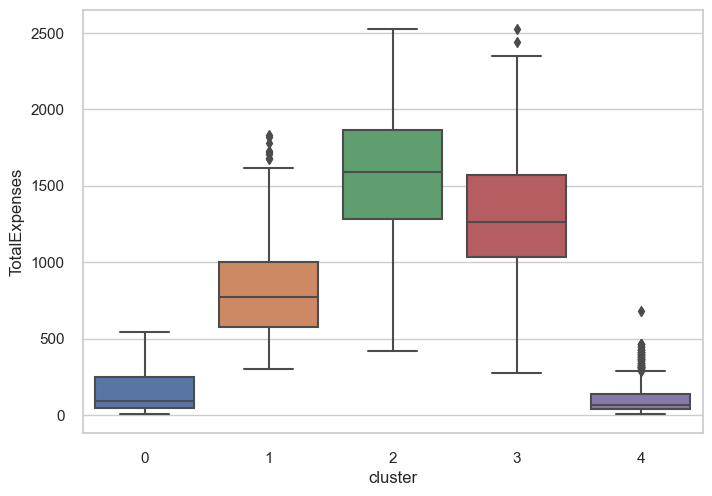

In [78]:
sns.boxplot(data = df, x = 'cluster', y = 'TotalExpenses')

<AxesSubplot:xlabel='TotalExpenses', ylabel='Income'>

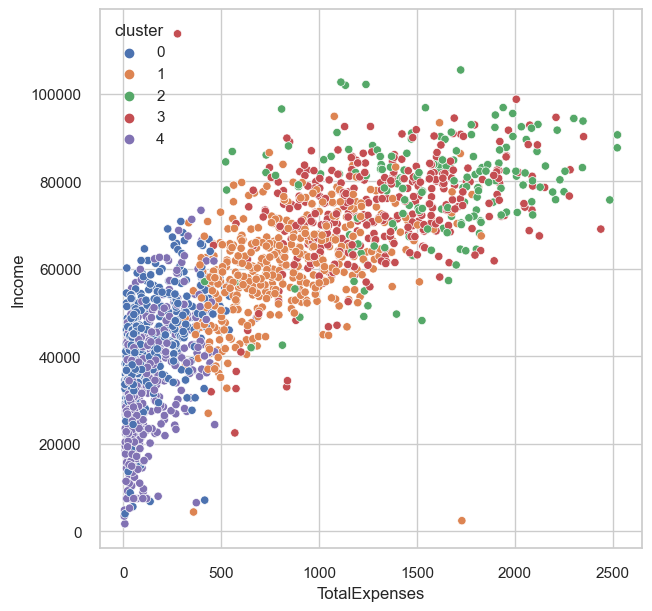

In [ ]:
fig= plt.subplots(figsize = (7,7))
sns.scatterplot(data = df, x = 'TotalExpenses', y = 'Income', hue = 'cluster', palette = 'deep')

Aqui apresento os 5 clusters gerados lado a lado para comparação:

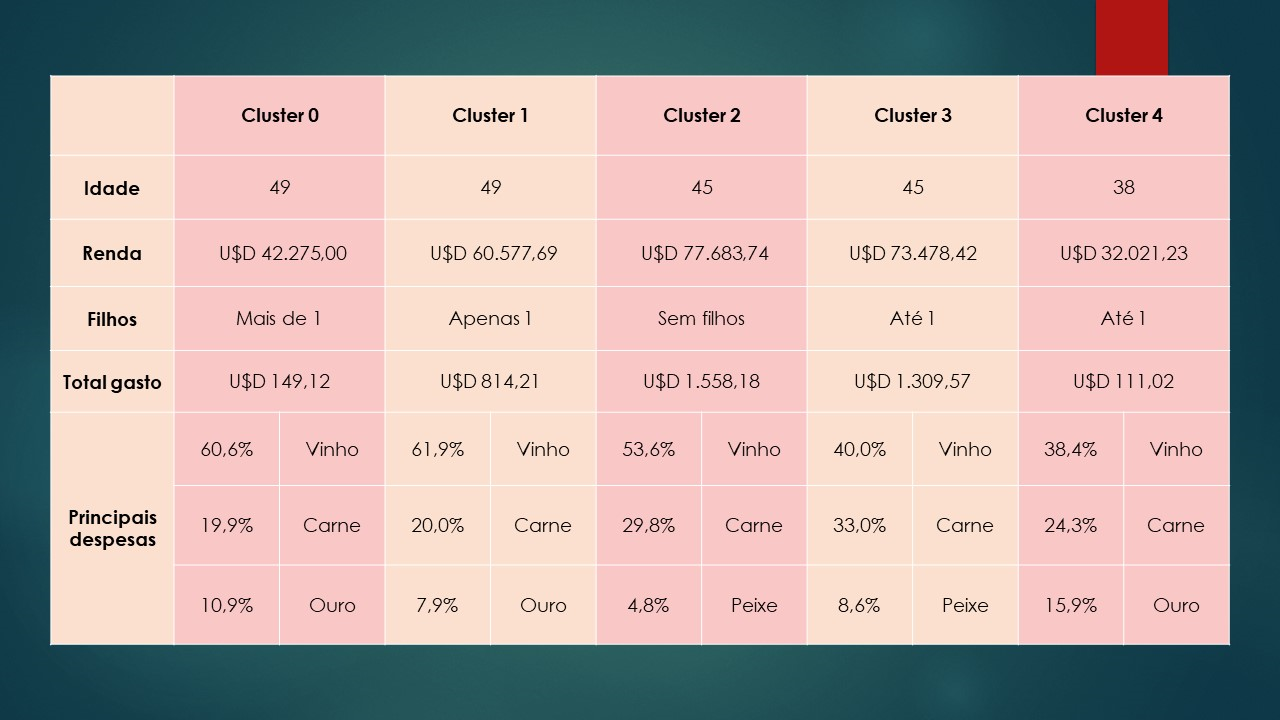